<a href="https://colab.research.google.com/github/insistedMarin/imageprocessing/blob/master/DLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd drive/MyDrive/deeplearning

/content/drive/MyDrive/deeplearning


In [50]:
!nvidia-smi

Sat Dec  3 12:10:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    31W /  70W |   5026MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


In [ ]:
!git clone https://github.com/ultralytics/yolov5

从github加载yolov5模型

In [52]:
%cd ..

/content/drive/MyDrive/deeplearning/yolov5/runs


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 41.5 MB/s 


初始化配置

In [ ]:
%cd content/drive/MyDrive/deeplearning/yolov5

/content/drive/MyDrive/deeplearning/yolov5


In [ ]:
# import os
# import cv2
# import numpy as np
# array_of_img = []
# def read_directory(directory_name):
#     for filename in os.listdir(r"./" + directory_name):
#         img = cv2.imread(directory_name + "/" + filename)
#         array_of_img.append(img)

#     return array_of_img

# data = read_directory("runs/detect/exp2/crops/leaves")

In [ ]:
import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


加载pytorch

In [53]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 850 kB/s 
     |████████████████████████████████| 178 kB 58.7 MB/s 
     |████████████████████████████████| 145 kB 66.6 MB/s 
     |████████████████████████████████| 138 kB 67.9 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e41767d2b86a2e21d41319a33e55cf9ac1da6ce0f5dd013450d4b31d81b7e7bf
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

加载roboflow

In [ ]:
# %cd drive/MyDrive/deeplearning

[Errno 2] No such file or directory: 'drive/MyDrive/deeplearning'
/content/drive/MyDrive/deeplearning


In [ ]:
# %cd yolov5

/content/drive/MyDrive/deeplearning/yolov5


In [54]:
from roboflow import Roboflow
rf = Roboflow(api_key="RqXyEhSOFWfIwDNivY8c")
project = rf.workspace("cytech-lv8hq").project("dlproject-egkgt")
dataset = project.version(6).download("yolov7")



loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to DLProject-6 in yolov7pytorch:: 100%|██████████| 672/672 [00:03<00:00, 175.24it/s]


引用roboflow数据集

In [56]:
!pip install clearml>=1.2.0

In [57]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=AFEPJA0DB83UD84PRWSJ
%env CLEARML_API_SECRET_KEY=QiJkYScyU5sjsWQryG0lZvFUtYt0Rg93J1imHBW4Hjt4dmSmAx

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=AFEPJA0DB83UD84PRWSJ
env: CLEARML_API_SECRET_KEY=QiJkYScyU5sjsWQryG0lZvFUtYt0Rg93J1imHBW4Hjt4dmSmAx


下面init时，输入的用户名和密码，host 就用https://app.clear.ml

In [58]:
!clearml-init

ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:
AFEPJA0DB83UD84PRWSJ
Could not parse credentials, please try entering them manually.
Enter user access key: AFEPJA0DB83UD84PRWSJ
Enter user secret: QiJkYScyU5sjsWQryG0lZvFUtYt0Rg93J1imHBW4Hjt4dmSmAx
Detected credentials key="AFEPJA0DB83UD84PRWSJ" secret="QiJk***"

Editing configuration file: /root/clearml.conf
Enter the url of the clearml-server's Web service, for example: https://api.clear.ml

WEB Host configured to: https://app.clear.ml

ClearML Hosts configuration:
Web App: https://app.clear.ml
API: https://api.clear.ml
File Store: https://files.clear.ml

Verifying credentials ...
Credentials verified!


In [61]:
%cd ..

/content/drive/MyDrive/deeplearning/yolov5


In [64]:
!python train.py --img 640 --batch 64 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/deeplearning/yolov5/runs/DLProject-6/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 54 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-235-g75728bb Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0

使用初始模型训练

In [65]:
!python detect.py --weights runs/train/exp20/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/train/images
!python detect.py --weights runs/train/exp20/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/valid/images
!python detect.py --weights runs/train/exp20/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp20/weights/best.pt'], source=/content/drive/MyDrive/deeplearning/yolov5/runs/DLProject-6/train/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-235-g75728bb Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/154 /content/drive/MyDrive/deeplearning/yolov5/runs/DLProject-6/train/images/amborella082_jpg.rf.a578264a25be6bfd33ecbf768926af19.jpg: 640x640 1 Type feuille, 4 leavess, 3 ligneuxs, 12.7ms
image 2/154 /content/drive/MyDrive/deeplearning/yolov5/runs/DLProject-6/train/images/amborella0

预测数据

In [ ]:

# import glob
# from IPython.display import Image, display

# for imageName in glob.glob('/content/drive/MyDrive/deeplearning/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
#     display(Image(filename=imageName))

In [ ]:
# model = torch.hub.load('.', 'custom', path='runs/train/exp3/weights/best.pt', source='local')

In [ ]:
# from PIL import Image
# im1 = Image.open('DLProject-2/test/images/amborella082_jpg.rf.6aaa492309e4282ed42380cd7e6ed9fe.jpg')
# imgs = [im1]

In [ ]:
# results = model(imgs)

In [ ]:
# results.show()

根据叶子识别

In [6]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

In [44]:
model = Sequential([
    # 核数，核尺寸，是否填充，激活函数
    layers.Conv2D(16, kernel_size=[4, 4], padding="valid", activation=tf.nn.relu),
    layers.Conv2D(16, kernel_size=[4, 4], padding="valid", activation=tf.nn.relu),
    # 池化核，填充

    layers.MaxPool2D(pool_size=[2, 2], strides=1, padding='valid'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dropout(0.4),
    layers.Dense(2)
])

In [21]:
import os

def read_directory(directory_name):
    data=[]
    for filename in os.listdir(r"./" + directory_name):
        label=filename.split('0')[0].split('1')[0]
        # img is used to store the image data
        img = cv2.imread(directory_name + "/" + filename)
        data.append((img,label))
    return data
def preprocess(data):
    result=[]
    for img in data:
      resized = cv2.resize(img[0], dim, interpolation = cv2.INTER_AREA)
      gray = cv2.cvtColor(resized,cv2.COLOR_RGB2GRAY)
      result.append(gray)
    return result


In [15]:
%cd runs/detect

/content/drive/MyDrive/deeplearning/yolov5/runs/detect


In [20]:
import matplotlib.pyplot as plt
dim = (200, 200)
train_set=read_directory('runs/detect/exp/crops/leaves')
valid_set=read_directory('runs/detect/exp5/crops/leaves')
test_set=read_directory('runs/detect/exp6/crops/leaves')
# resize image


error: ignored

In [38]:
train_x=preprocess(train_set)
x_test=preprocess(valid_set)
# for img in train_x:
#   plt.figure("Image") # 图像窗口名称
#   plt.imshow(img)
#   plt.show()

In [26]:
data_dictionary={'amborella':{'leaves':0},'castarea':{'leaves':1},'convolvulaceae':{'leaves':0},'desmodium':{'leaves':0},'eugenia':{'leaves':0},'laurus':{'leaves':0},'litsea':{'leaves':0},'magnolia':{'leaves':0},'monimiaceae':{'leaves':0},'rubus':{'leaves':1},'ulmus':{'leaves':1}}

# **数据字典，叶子 lisse=0 dente=1 补全其它属性**

In [33]:
def check_diction(data_set,attribute):
  result=[]
  for data in data_set:
    result.append(data_dictionary[data[1]][attribute])
  return result

查字典函数，给出数据集和要查询的属性，将属性数值化

In [39]:
y_train=check_diction(train_set,'leaves')
y_test=check_diction(valid_set,'leaves')
x_train=train_x

In [40]:
x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32) / 255

x_test = tf.convert_to_tensor(x_test, dtype=tf.float32) /255
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)
y_train = tf.one_hot(y_train, depth=2)
y_test = tf.one_hot(y_test, depth=2)

整理数据集

In [47]:
model.build(input_shape=[None, 200, 200, 1])

model.summary()

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_db = train_db.shuffle(10).batch(8)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = train_db.batch(8)
test_db = (x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 197, 197, 16)      272       
                                                                 
 conv2d_13 (Conv2D)          (None, 194, 194, 16)      4112      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 193, 193, 16)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 193, 193, 16)      0         
                                                                 
 flatten_1 (Flatten)         (None, 595984)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                38143040  
                                                      

建立模型

Epoch 1/10
3/3 [==============================] - 0s 111ms/step - loss: 0.0633 - accuracy: 0.9444 - val_loss: 1.1749 - val_accuracy: 0.7273
Epoch 2/10
3/3 [==============================] - 0s 38ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.5042 - val_accuracy: 0.7273
Epoch 3/10
3/3 [==============================] - 0s 33ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 3.7744 - val_accuracy: 0.7273
Epoch 4/10
3/3 [==============================] - 0s 33ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 3.6454 - val_accuracy: 0.7273
Epoch 5/10
3/3 [==============================] - 0s 34ms/step - loss: 1.3908e-06 - accuracy: 1.0000 - val_loss: 3.6563 - val_accuracy: 0.7273
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 8.1459e-07 - accuracy: 1.0000 - val_loss: 4.5955 - val_accuracy: 0.7273
Epoch 7/10
3/3 [==============================] - 0s 32ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 2.0581 - val_accuracy: 0.7273
Epoch 8/10
3/3 [==

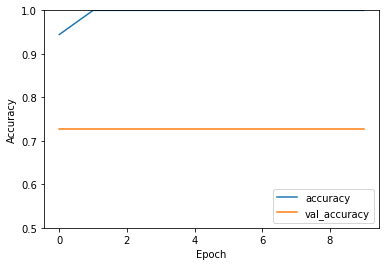

In [49]:
history = model.fit(train_db, epochs=10, validation_data=test_db)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

训练